####Question 1. PageRank Calculation
#####Given the graph and formula below, calculate the PageRank for all 5 ID's until the algorithms convergences with a Tolerance of 0.1. Assume the Probability of resetting to a random vertex of 0.2

In [0]:
from functools import reduce
from pyspark.sql.functions import col, lit, when
from graphframes import *

In [0]:
%python
 
from graphframes import *

# Create a Vertex DataFrame with unique ID column "id"
vertices = sqlContext.createDataFrame([
  ("ID1",),
  ("ID2",),
  ("ID3",),
  ("ID4",),
  ("ID5",) ], ["id"])
 
# Create an Edge DataFrame with "src" and "dst" columns
edges = sqlContext.createDataFrame([
  ("ID1", "ID3"),
  ("ID1", "ID5"),
  ("ID2", "ID1"),
  ("ID2", "ID3"),
  ("ID2", "ID4"),
  ("ID2", "ID5"),
  ("ID3", "ID2"),
  ("ID4", "ID3"),
  ("ID5", "ID2"),
  ("ID5", "ID3"),
], ["src", "dst"])
 
g = GraphFrame(vertices, edges)
print(g)

GraphFrame(v:[id: string], e:[src: string, dst: string])

In [0]:
display(g.vertices)

id
ID1
ID2
ID3
ID4
ID5


In [0]:
display(g.edges)

src,dst
ID1,ID3
ID1,ID5
ID2,ID1
ID2,ID3
ID2,ID4
ID2,ID5
ID3,ID2
ID4,ID3
ID5,ID2
ID5,ID3


In [0]:
display(g.outDegrees)

id,outDegree
ID1,2
ID2,4
ID3,1
ID4,1
ID5,2


In [0]:
display(g.inDegrees)

id,inDegree
ID3,4
ID5,2
ID1,1
ID4,1
ID2,2


#####*Calculating the PageRank for all 5 IDs*

In [0]:
results = g.pageRank(resetProbability=0.2, tol=0.1)
display(results.vertices)

id,pagerank
ID2,1.4670296430732002
ID3,1.367211131276467
ID5,0.8227465214761042
ID1,0.6715063520871143
ID4,0.6715063520871143


In [0]:
display(results.edges) #just as a reference

src,dst,weight
ID2,ID1,0.25
ID3,ID2,1.0
ID5,ID2,0.5
ID5,ID3,0.5
ID1,ID3,0.5
ID2,ID3,0.25
ID4,ID3,1.0
ID2,ID4,0.25
ID1,ID5,0.5
ID2,ID5,0.25


####Question 2. Triangle Count Calculation
#####Given the graph in the 'followers.txt' file, please visualize the graph and show the triangle count for each of its vertices.

#####*Visualize the Graph*
I will use NetworkX to visualize the graph of 'followers.txt' because this dataset is relatively small, and it's efficient to draw in NetworkX.
Accordingly, ahead of this, I installed networkx library in the cluster I'm using now.

In [0]:
from functools import reduce
from pyspark.sql.functions import col, lit, when
from graphframes import *

In [0]:
from pyspark import SQLContext

sqlContext = SQLContext(sc)

nodes = sqlContext.createDataFrame([
  ("1",),
  ("2",),
  ("3",),
  ("4",),
  ("6",),
  ("7",) ], ["id"])


edges = sqlContext.createDataFrame([
  ("2", "1"),
  ("4", "1"),
  ("1", "2"),
  ("6", "3"),
  ("7", "3"),
  ("7", "6"),
  ("6", "7"),
  ("3", "7"),
  ("3", "1"),
  ("4", "3"),
], ["src", "dst"])

from graphframes import *
g = GraphFrame(nodes, edges)

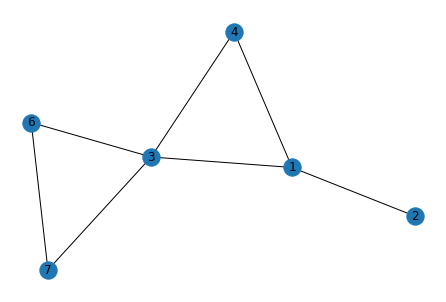

In [0]:
import networkx as nx
gp = nx.from_pandas_edgelist(edges.toPandas(),'src','dst')
nx.draw(gp, with_labels = True)

#####*Calculate Triangle Count*

In [0]:
%scala
import org.apache.spark.graphx.{GraphLoader, PartitionStrategy}

// Load the edges in canonical order and partition the graph for triangle count
val graph = GraphLoader.edgeListFile(sc, "/FileStore/tables/followers-2.txt", true).partitionBy(PartitionStrategy.RandomVertexCut)

// Find the triangle count for each vertex
val triCounts = graph.triangleCount().vertices

// Print the result 
println(triCounts.collect().mkString("\n"))
val triCounts_df = triCounts.toDF(Seq("node", "counts"): _*)
display(triCounts_df)


node,counts
4,1
6,1
2,0
1,1
3,2
7,1
